In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading data into dataframe

In [2]:
loan = pd.read_csv("/Users/tanseeming/Downloads/data/loan.csv")
payment = pd.read_csv("/Users/tanseeming/Downloads/data/payment.csv")
underwriting = pd.read_csv("/Users/tanseeming/Downloads/data/clarity_underwriting_variables.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Questions
Exploratory data analysis

Good/Bad loans

What are the reasons for a loan to be approved?

Feature engineering

## EDA

In [3]:
loan.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
loanId                              577426 non-null object
anon_ssn                            577682 non-null object
payFrequency                        576409 non-null object
apr                                 573760 non-null float64
applicationDate                     577682 non-null object
originated                          577682 non-null bool
originatedDate                      46044 non-null object
nPaidOff                            577658 non-null float64
approved                            577682 non-null bool
isFunded                            577682 non-null int64
loanStatus                          577291 non-null object
loanAmount                          575432 non-null float64
originallyScheduledPaymentAmount    577682 non-null float64
state                               577550 non-null object
leadType                            577682 non-null object
leadCo

In [5]:
loan['loanStatus'].value_counts()

Withdrawn Application          450984
Rejected                        85070
Paid Off Loan                   11427
External Collection             11334
New Loan                         8112
Internal Collection              5567
Returned Item                    1182
CSR Voided New Loan              1026
Settlement Paid Off               708
Credit Return Void                704
Customer Voided New Loan          504
Settled Bankruptcy                326
Pending Paid Off                  169
Charged Off Paid Off              160
Pending Application Fee             5
Pending Rescind                     4
Pending Application                 4
Voided New Loan                     2
Customver Voided New Loan           1
Settlement Pending Paid Off         1
Charged Off                         1
Name: loanStatus, dtype: int64

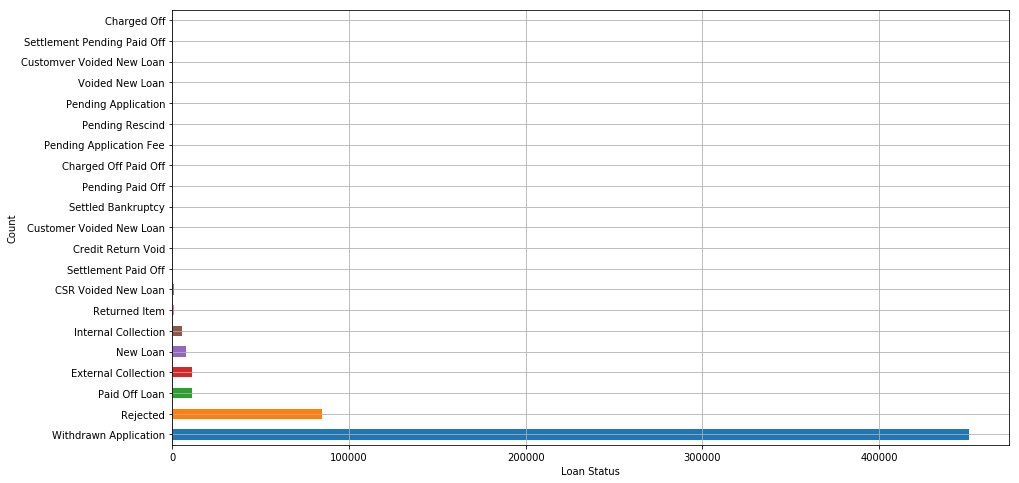

In [6]:
plt.figure(figsize= (15,8))
plt.xlabel('Loan Status')
plt.ylabel('Count')
loan['loanStatus'].value_counts().plot(kind = 'barh', grid = True)
plt.show()

In [7]:
withdraw = len(loan[(loan.loanStatus == 'Withdrawn Application')])
print ('Withdrawn Application Ratio: %.2f%%'  % (withdraw/len(loan)*100))

Withdrawn Application Ratio: 78.07%


In [8]:
loan_amount = loan["loanAmount"].values
loan_amount

array([ 500., 3000.,  400., ...,  300.,  300.,  400.])

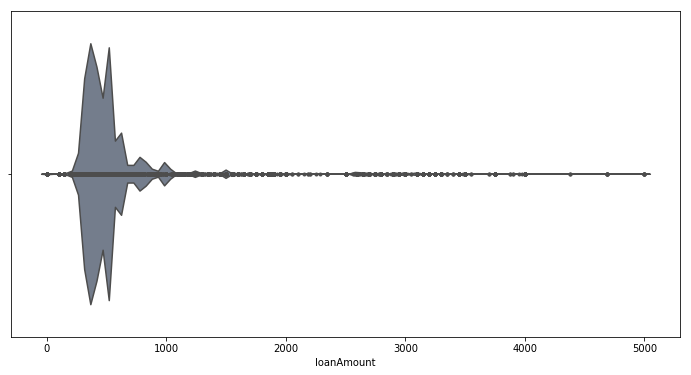

In [9]:
plt.figure(figsize=(12,6))
sns.violinplot(loan["loanAmount"], inner="point", palette="bone")

Total amount for most of the loans are in the range between 0 to 1000

Text(0,0.5,'State')

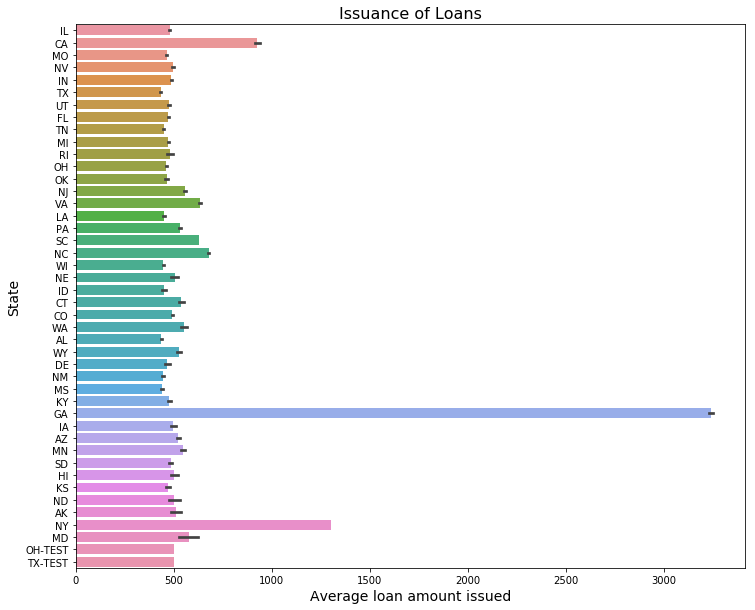

In [57]:
plt.figure(figsize=(12,10))
sns.barplot(x='loanAmount', y='state', data=loan)
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Average loan amount issued', fontsize=14)
plt.ylabel('State', fontsize=14)

Georgia is having the highest average loan amount in the States, followed by New York

Text(0,0.5,'State')

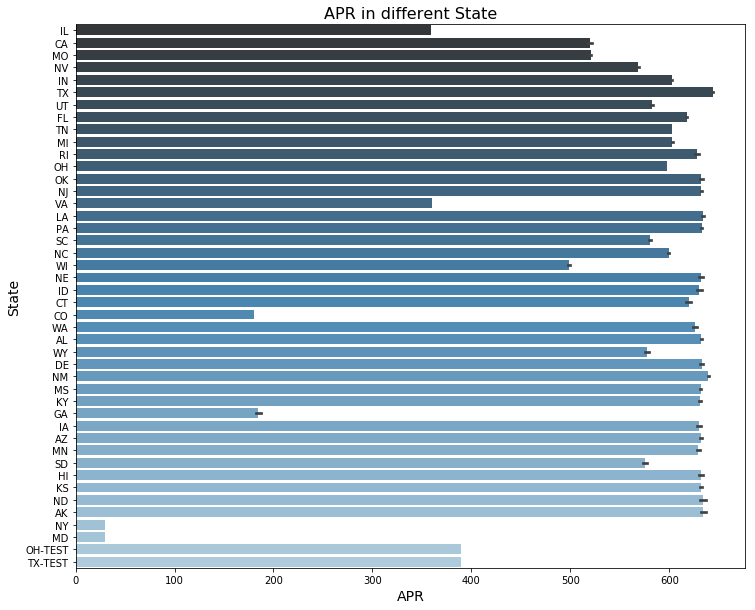

In [58]:
plt.figure(figsize=(12,10))
sns.barplot(x= loan['apr'], y= loan['state'], palette = 'Blues_d')
plt.title('APR in different State', fontsize=16)
plt.xlabel('APR', fontsize=14)
plt.ylabel('State', fontsize=14)

The most reasonable explaination for high loan amount is low annual percentage rate. As the graph above, Georgia having an average of approximately 180 apr, which is comparatively low. New York is lowest among all of the state.

## Correlation between the variables
Just to check what are the reasons that causes the fluctuation of apr, since different state having different apr.

In [11]:
loan.corr()

,apr,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF
apr,1.000000,-0.062596,-0.074328,-0.062880,-0.062981,-0.279014,-0.049065,-0.090854,-0.038632
originated,-0.062596,1.000000,0.251177,0.927619,0.914481,0.113053,0.101958,0.100570,0.141283
nPaidOff,-0.074328,0.251177,1.000000,0.267276,0.269711,0.074269,0.046704,-0.046266,-0.046038
approved,-0.062880,0.927619,0.267276,1.000000,0.985783,0.106731,0.095947,0.090248,0.119974
isFunded,-0.062981,0.914481,0.269711,0.985783,1.000000,0.105397,0.094359,0.085112,0.116856
loanAmount,-0.279014,0.113053,0.074269,0.106731,0.105397,1.000000,0.892881,0.204856,0.178698
originallyScheduledPaymentAmount,-0.049065,0.101958,0.046704,0.095947,0.094359,0.892881,1.000000,0.191381,0.169256
leadCost,-0.090854,0.100570,-0.046266,0.090248,0.085112,0.204856,0.191381,1.000000,0.210834
hasCF,-0.038632,0.141283,-0.046038,0.119974,0.116856,0.178698,0.169256,0.210834,1.000000


Based on the correlation, all of the factors have a weak negative correlation with apr. Hence, these factors are not the main factors that affect the apr for the loans.

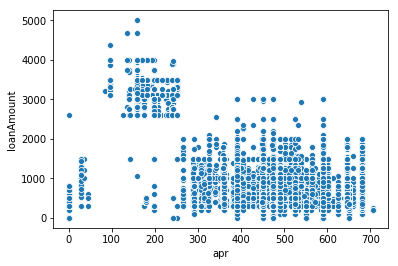

In [12]:
sns.scatterplot(x= loan['apr'], y= loan['loanAmount'])

In [13]:
payment.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


In [14]:
payment['paymentStatus'].value_counts()

Cancelled                  270334
Checked                    209621
None                       164057
Rejected                    32330
Pending                      9241
Skipped                      3761
Rejected Awaiting Retry        18
Complete                        1
Returned                        1
Name: paymentStatus, dtype: int64

In [15]:
good_loan = ['Checked','None','Complete','Pending']

In [16]:
#Condition to classify the good and bad loans
payment['loan_condition'] = np.nan

def loan_condition(status):
    if status in good_loan:
        return 'Good Loan'
    else:
        return 'Bad Loan'
    
payment['loan_condition'] = payment['paymentStatus'].apply(loan_condition)

Text(0,0.5,'% of Condition of Loans')

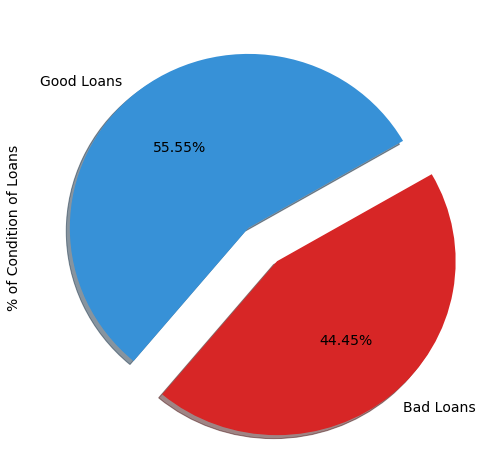

In [17]:
plt.figure(figsize=(8,8))
payment["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', colors = ["#3791D7", "#D72626"], shadow=True, labels=("Good Loans", "Bad Loans"), fontsize=14, startangle=30)
plt.ylabel('% of Condition of Loans', fontsize=14)

For good and bad loans are decided based on description of the columns. For "pending" would be considered as good loan, however there is a risk that at the end of it some of these loans might become bad loans.

In [18]:
underwriting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                    49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                               49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                     49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                       49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                    49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago                                     49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago                                    49750 non-null float64
.underwri

In [19]:
underwriting_corr = underwriting.corr()
underwriting_corr

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore
.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,1.000000,0.510785,-0.218232,0.325573,0.786394,0.723825,0.117454,0.860943,0.477157,0.063049,0.037728,-0.015823,-0.473009
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,0.510785,1.000000,-0.054307,0.764738,0.346722,0.784361,0.446901,0.647611,0.162105,0.047607,0.027167,0.009624,-0.282598
.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,-0.218232,-0.054307,1.000000,0.080820,-0.209709,-0.149575,0.357579,-0.188753,-0.177166,-0.049944,-0.024280,-0.003169,0.278027
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,0.325573,0.764738,0.080820,1.000000,0.205327,0.558613,0.657633,0.440811,0.078283,0.044235,0.026793,0.015592,-0.182037
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,0.786394,0.346722,-0.209709,0.205327,1.000000,0.524645,0.049018,0.641677,0.680162,0.062749,0.054695,-0.029294,-0.455191
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,0.723825,0.784361,-0.149575,0.558613,0.524645,1.000000,0.285343,0.870878,0.283418,0.057031,0.029239,0.000384,-0.397889
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,0.117454,0.446901,0.357579,0.657633,0.049018,0.285343,1.000000,0.199763,-0.018787,0.028186,0.016989,0.020352,-0.014151
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,0.860943,0.647611,-0.188753,0.440811,0.641677,0.870878,0.199763,1.000000,0.370434,0.061862,0.033827,-0.008941,-0.454634
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,0.477157,0.162105,-0.177166,0.078283,0.680162,0.283418,-0.018787,0.370434,1.000000,0.066022,0.075441,-0.043562,-0.362612
.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,0.063049,0.047607,-0.049944,0.044235,0.062749,0.057031,0.028186,0.061862,0.066022,1.000000,0.052515,0.157189,-0.228908


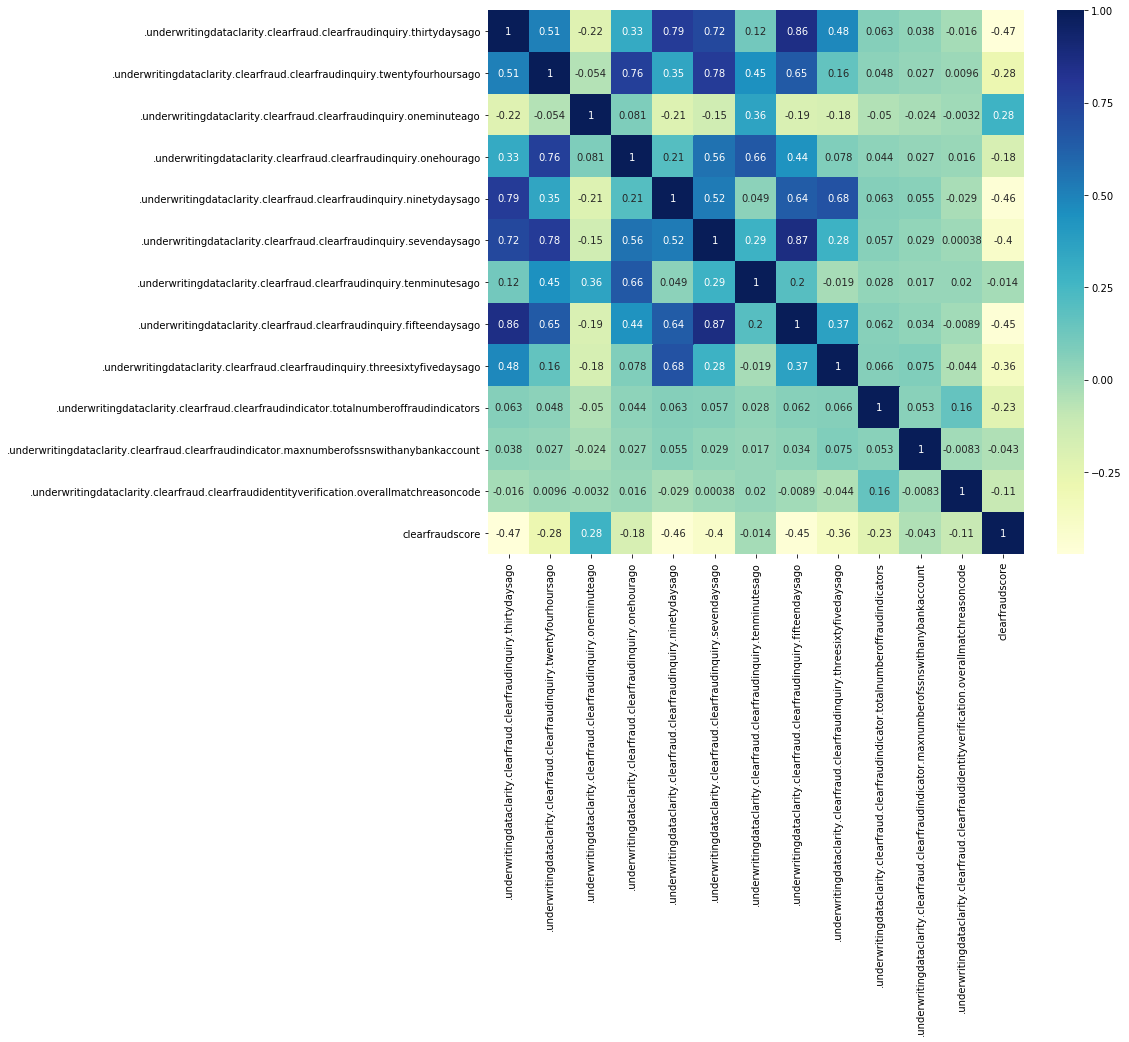

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(underwriting_corr, annot=True, cmap="YlGnBu")

Based on the correlation, the significant factor that causes the decrease of fraud score is "clearfraudinquiry.thirtydaysago" with a moderate negative correlation of -0.47. Followed by "ninetydaysago", -0.46, then "fifteendaysago", -0.45.

For every single point increase in these factors, will decrease fraud score by 0.47, 0.46, 0.45 respectively

"clearfraudscore" is the main approval indicator for underwriting. Based on my understanding, underwriting is the first step before approving a loan.

The lower the score, the most likely the loan will be default. Hence, by looking at clearfraudscore will be able to answer the question, what are the factors that causes the loan to be approved.

## Dummies for state column

In [21]:
loan_state = pd.get_dummies(loan['state'])
loan_new = pd.concat([loan, loan_state], axis=1)
loan_new

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,SC,SD,TN,TX,TX-TEST,UT,VA,WA,WI,WY
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.00,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,...,0,0,0,0,0,0,0,0,0,0
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.00,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,...,0,0,0,0,0,0,0,0,0,0
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.00,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,...,0,0,0,0,0,0,0,0,0,0
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.00,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,...,0,0,0,0,0,0,0,0,0,0
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.00,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,...,0,0,0,0,0,0,0,0,0,0
5,LL-I-09734486,b5541f49472fa0fce8e473306768f7fb,M,650.00,2016-06-12T19:27:47.951000,False,NaN,0.0,False,0,...,0,0,0,0,0,0,0,0,0,0
6,LL-I-15006968,1828c64bb2dffeae88b27174a9f79ecc,B,680.00,2017-01-12T18:04:37.921000,False,NaN,0.0,False,0,...,0,0,0,1,0,0,0,0,0,0
7,LL-I-08327946,02596517e7633c7e87e6b333a0fb1bbe,M,449.99,2016-04-01T22:13:02.131000,False,NaN,0.0,False,0,...,0,0,0,0,0,1,0,0,0,0
8,LL-I-10568307,523ed92e1145eb688bb631da24695197,S,251.00,2016-07-27T00:19:52.808000,False,NaN,0.0,False,0,...,0,0,0,0,0,0,0,0,0,0
9,LL-I-05518977,47bf79119075e41ef65510f2900c8e4a,B,360.00,2015-12-09T18:17:33.622000,False,NaN,0.0,False,0,...,0,0,0,0,0,0,0,0,0,0


## Merging csv

In [22]:
merge = pd.merge(loan_new, underwriting,left_on='clarityFraudId', right_on='underwritingid')
merge

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.00,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,569eb3a3e4b096699f685d64
1,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.00,2017-03-01T15:55:41.823000,True,2017-03-01T16:15:13.016000,0.0,True,1,...,(U) Unlisted,match,NaN,NaN,NaN,NaN,match,1.0,658.0,58b6eef8e4b0b6fca82fd426
2,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2017-01-31T17:48:17.381000,True,2017-01-31T18:00:14.520000,2.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,835.0,58450a15e4b0bb9d6d7344c7
3,LL-I-17491287,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2017-02-21T17:20:23.671000,True,2017-02-21T17:45:11.088000,3.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,835.0,58450a15e4b0bb9d6d7344c7
4,LL-I-15679301,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2017-01-18T01:16:24.941000,True,2017-01-18T01:30:16.712000,1.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,835.0,58450a15e4b0bb9d6d7344c7
5,LL-I-12500318,bc9fa73468acf18cb968a3a6a3c4697c,S,490.00,2016-12-05T06:19:59.756000,True,2016-12-05T06:45:04.331000,0.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,835.0,58450a15e4b0bb9d6d7344c7
6,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.00,2016-08-27T09:08:05.442000,True,2016-08-29T15:05:04.014000,0.0,True,1,...,(P) Pager,match,NaN,NaN,NaN,NaN,match,1.0,624.0,578f9346e4b0810ad5e7b72e
7,LL-I-18309774,10cefd11d41612b032fd9cd2debe32dc,B,159.00,2017-03-13T03:55:39.599000,True,2017-03-13T21:15:16.293000,1.0,True,1,...,(P) Pager,match,NaN,NaN,NaN,NaN,match,1.0,624.0,578f9346e4b0810ad5e7b72e
8,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,W,404.10,2016-05-25T03:05:18.849000,True,2016-05-25T15:11:36.260000,3.0,True,1,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,770.0,56621584e4b0100e84141586
9,LL-I-10219067,1d249e27292d25e4d3b4bc142a2a4aea,W,381.65,2016-07-08T16:31:13.341000,True,2016-07-08T21:28:07.169000,4.0,True,1,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,770.0,56621584e4b0100e84141586


## Dropping columns

In [23]:
merge.drop(['loanId','anon_ssn','payFrequency','clarityFraudId','apr','state','applicationDate','originated','originatedDate','isFunded','loanStatus','originallyScheduledPaymentAmount','leadType','leadCost','fpStatus','hasCF'], axis=1, inplace=True)

In [24]:
merge.drop(['.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedpriortossnissuedate',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseformatinvalid',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresscautious',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresshighrisk',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.inquirycurrentaddressnotonfile',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.morethan3inquiriesinthelast30days',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict',           
            '.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddressnonresidential',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.highprobabilityssnbelongstoanother',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncodedescription',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamematch',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncodedescription',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtype',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch',
            'underwritingid'], axis=1, inplace=True)

### Showing only not null values in the column 'clearfraudscore'

In [25]:
merge = merge[pd.notnull(merge['clearfraudscore'])]
merge

,nPaidOff,approved,loanAmount,AK,AL,AZ,CA,CO,CT,DE,...,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore
0,0.0,True,3000.0,0,0,0,1,0,0,0,...,3.0,3.0,3.0,3.0,3.0,4.0,0.0,1.0,5.0,879.0
1,0.0,True,400.0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,3.0,5.0,1.0,1.0,658.0
2,2.0,True,1250.0,0,0,0,0,0,0,0,...,4.0,5.0,4.0,1.0,4.0,10.0,1.0,2.0,6.0,835.0
3,3.0,True,1250.0,0,0,0,0,0,0,0,...,4.0,5.0,4.0,1.0,4.0,10.0,1.0,2.0,6.0,835.0
4,1.0,True,500.0,0,0,0,0,0,0,0,...,4.0,5.0,4.0,1.0,4.0,10.0,1.0,2.0,6.0,835.0
5,0.0,True,500.0,0,0,0,0,0,0,0,...,4.0,5.0,4.0,1.0,4.0,10.0,1.0,2.0,6.0,835.0
6,0.0,True,800.0,0,0,0,1,0,0,0,...,3.0,42.0,3.0,3.0,6.0,255.0,2.0,1.0,1.0,624.0
7,1.0,True,2600.0,0,0,0,1,0,0,0,...,3.0,42.0,3.0,3.0,6.0,255.0,2.0,1.0,1.0,624.0
8,3.0,True,300.0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,770.0
9,4.0,True,350.0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,770.0


In [26]:
merge.sort_values(['clearfraudscore'],ascending = False)

,nPaidOff,approved,loanAmount,AK,AL,AZ,CA,CO,CT,DE,...,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore
22649,0.0,True,1250.0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,3.0,0.0,1.0,2.0,965.0
18930,0.0,True,1800.0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,3.0,0.0,1.0,1.0,965.0
29019,0.0,True,1800.0,0,0,0,0,0,0,0,...,5.0,5.0,5.0,5.0,5.0,5.0,0.0,1.0,1.0,963.0
9047,1.0,True,3200.0,0,0,0,1,0,0,0,...,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,963.0
8391,0.0,True,1800.0,0,0,0,0,0,0,0,...,6.0,6.0,6.0,6.0,6.0,6.0,1.0,1.0,1.0,962.0
33819,4.0,True,700.0,0,0,0,0,0,0,0,...,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,962.0
27048,0.0,True,1500.0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,4.0,961.0
22817,0.0,True,1500.0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,961.0
34859,0.0,True,1500.0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,961.0
28189,0.0,True,1000.0,0,0,0,0,0,0,0,...,2.0,2.0,2.0,2.0,2.0,9.0,1.0,1.0,6.0,960.0


In [27]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36225 entries, 0 to 36333
Data columns (total 60 columns):
nPaidOff                                                                                     36223 non-null float64
approved                                                                                     36225 non-null bool
loanAmount                                                                                   36208 non-null float64
AK                                                                                           36225 non-null uint8
AL                                                                                           36225 non-null uint8
AZ                                                                                           36225 non-null uint8
CA                                                                                           36225 non-null uint8
CO                                                                                        

### Filling null values with median

In [28]:
merge.nPaidOff = merge.nPaidOff.fillna(merge.nPaidOff.median())

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [29]:
merge.loanAmount = merge.loanAmount.fillna(merge.loanAmount.median())

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [30]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36225 entries, 0 to 36333
Data columns (total 60 columns):
nPaidOff                                                                                     36225 non-null float64
approved                                                                                     36225 non-null bool
loanAmount                                                                                   36225 non-null float64
AK                                                                                           36225 non-null uint8
AL                                                                                           36225 non-null uint8
AZ                                                                                           36225 non-null uint8
CA                                                                                           36225 non-null uint8
CO                                                                                        

# Feature Engineering

## SVM

In [31]:
from sklearn.model_selection import train_test_split
y = merge['approved']
X = merge.loc[:, merge.columns != 'approved']
from sklearn import metrics

In [32]:
from sklearn.model_selection import train_test_split

y = merge['approved']
X = merge.loc[:, merge.columns != 'approved']

X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split (X, y, test_size=0.2, random_state=5)

In [33]:
print ('Train set:', X_trainSVM.shape,  y_trainSVM.shape)
print ('Test set:', X_testSVM.shape,  y_testSVM.shape)

Train set: (28980, 59) (28980,)
Test set: (7245, 59) (7245,)


In [34]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', max_iter = -1)
clf.fit(X_trainSVM, y_trainSVM) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
yhatSVM = clf.predict(X_testSVM)
yhatSVM[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_trainLR, X_testLR, y_trainLR , y_testLR = train_test_split(X, y, test_size=0.2, random_state=5)
logreg = LogisticRegression()
logreg.fit(X_trainLR, y_trainLR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
yhatLR = logreg.predict(X_testLR)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_testLR, y_testLR)))

Accuracy of logistic regression classifier on test set: 0.89


In [38]:
LR_yhat_prob = logreg.predict_proba(X_testLR)
LR_yhat_prob

array([[0.09358097, 0.90641903],
       [0.10313988, 0.89686012],
       [0.11214178, 0.88785822],
       ...,
       [0.23020591, 0.76979409],
       [0.11558612, 0.88441388],
       [0.07318261, 0.92681739]])

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X, y, test_size=0.2, random_state=5)
print ('Train set:', X_trainDT.shape,  y_trainDT.shape)
print ('Test set:', X_testDT.shape,  y_testDT.shape)

Train set: (28980, 59) (28980,)
Test set: (7245, 59) (7245,)


In [40]:
mergeDT = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
mergeDT # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
mergeDT.fit(X_trainDT,y_trainDT)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
yhatDT = mergeDT.predict(X_testDT)
yhatDT

array([ True,  True,  True, ...,  True,  True,  True])

In [43]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testDT, yhatDT))

DecisionTrees's Accuracy:  0.8985507246376812


## KNN

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (28980, 59) (28980,)
Test set: (7245, 59) (7245,)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [46]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([ True,  True,  True,  True,  True])

In [47]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8922360248447205
Test set Accuracy:  0.88391994478951


In [48]:
#Trying different K
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.82719117, 0.75969634, 0.86349206, 0.84085576, 0.878951  ,
       0.87011732, 0.88391994, 0.87977916, 0.88847481, 0.88709455,
       0.88957902, 0.88764665, 0.8905452 , 0.88957902])

In [49]:
k = 13
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat = kNN_model.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8888888888888888
Test set Accuracy:  0.8905452035886818


# Evaluation

In [50]:
from sklearn.metrics import jaccard_similarity_score, f1_score,log_loss

### SVM

In [51]:
print("SVM F1-score: %.2f" % f1_score(y_testSVM, yhatSVM, average='weighted'))
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_testSVM, yhatSVM))

SVM F1-score: 0.86
SVM Jaccard index: 0.90


### Logistic Regression 

In [52]:
print("LR F1-score: %.2f" % f1_score(y_testLR, yhatLR, average='weighted'))
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_testLR, yhatLR))
print("LR LogLoss: %.2f" % log_loss(y_testLR, LR_yhat_prob))

LR F1-score: 0.85
LR Jaccard index: 0.89
LR LogLoss: 0.31


### Decision Tree

In [53]:
print("DT F1-score: %.2f" % f1_score(y_testDT, yhatDT, average='weighted'))
print("DT Jaccard index: %.2f" %jaccard_similarity_score(y_testDT, yhatDT))

DT F1-score: 0.86
DT Jaccard index: 0.90


### KNN

In [54]:
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted'))
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))

KNN F1-score: 0.84
KNN Jaccard index: 0.89


# Report

| Algorithm          | F1-score | Jaccard | LogLoss |
|--------------------|----------|---------|---------|
| SVM                | 0.86     | 0.90    | NA      |
| LogisticRegression | 0.85     | 0.89    | 0.31    |
| Decision Tree      | 0.86     | 0.90    | NA      |
| KNN.               | 0.84     | 0.89    | NA      |

The main purpose of doing classification by merging 2 csv is by using the factors/variables in clarity_underwriting to determine the approval of the loan.

In terms of risk, in my opinion in order to reduce it, by not giving unnecessary loans to high risk client's. Eventually it all goes back to the fundamental, which is the clarity underwriting.

Due to time constraint, there are a lot of things that i haven't tried. Such as trying other different kinds of model and more visualisations. Might be more interesting.

The total time used for this challenge is approximately 2 days.